In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

In [24]:
df = pd.read_table("orange_small_train_data/orange_small_train.data")
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


#### Load Churn Data 

In [3]:
churn = pd.read_table("orange_small_train_data/orange_small_train_churn.labels", header = None)
print(churn.shape)
print()
print(pd.Series(churn[0]).value_counts())

(50000, 1)

-1    46328
 1     3672
Name: 0, dtype: int64


- Removing completely Nan Columns
- 18 columns have only Nan Values

In [4]:
df.dropna(thresh=1, axis = 1, inplace=True)
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86


* Plotting column vs NaN Count

In [5]:
nansum = {}
for column in df.columns:
    nansum[df[column].isna().sum()] = column[3:]


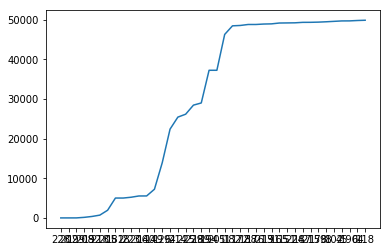

In [6]:
lists = sorted(nansum.items())
x, y = zip(*lists)
plt.plot(y,x)
plt.show()


* Unique count in each feature

In [7]:
uniquecount = {}
for column in df.columns:
    uniquecount[column] = df[column].nunique()


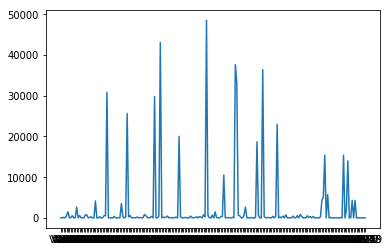

In [8]:
x, y = zip(*uniquecount.items())
plt.plot(x,y)
plt.show()

### Dropping columns with >70% NaN values

In [9]:
df1 = df.dropna(thresh= (0.3*len(df)), axis = 1)
df1.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86


### Feature Engineering <-- Adding new features
- **Number of NaN values in each row** : In this feature we just count the number of NaN values present in each instance of the dataset.
- ~~**Binary feature to indicate presence or absence of NaN value for a feature in each instance** : In this we put the value 0, if NaN is not present for the feature for the particular datapoint, otherwise 1.~~

In [10]:
df1['NaNCount'] = df.isnull().sum(axis=1).tolist()

In [11]:
df1.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229,NaNCount
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,144
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,146
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,139
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,154
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,137


### Handling NaN values

 #### Numerical Features
 - **Replace NaN values with mean(of respective columns) +1**


In [12]:
numeric_features = df1.select_dtypes(include=['float64']).columns

In [13]:
for column in numeric_features:
    df1[column] = df1[column].fillna(df[column].mean() + 1)

df1[numeric_features].head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,185.0,0.0,9.000000,397579.000000,1812252.0,142.0,38418.0,0.0,0.0,462.000000
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,0.0,0.0,9.000000,278334.000000,10439160.0,32.0,238572.0,0.0,0.0,271.142137
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,800.0,0.0,36.000000,320565.000000,9826360.0,206.0,434946.0,0.0,0.0,271.142137
3,1327.437116,0.0,0.0,235.518225,0.0,5.507926,0.0,22.08,0.0,0.0,...,0.0,0.0,12.727665,294921.804255,0.0,0.0,0.0,0.0,0.0,271.142137
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,3255.0,0.0,9.000000,267162.000000,644836.0,2.0,0.0,0.0,0.0,271.142137


#### Categorical Features

In [14]:
categorical_features = df1.select_dtypes(include=['object']).columns

In [15]:
for column in categorical_features:
    df1[column] = df1[column].fillna('LoremIpsum')
df1[categorical_features].head()

,Var192,Var193,Var195,Var196,Var197,Var198,Var199,Var200,Var202,Var203,...,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,bZkvyxLkBI,RO12,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,LoremIpsum,dXGu,9_Y1,...,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,LoremIpsum,xb3V,RAYp,F2FyR07IdsN7I,LoremIpsum
1,CEat0G8rTN,RO12,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,LoremIpsum,lg1t,9_Y1,...,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,LoremIpsum,fKCe,RAYp,F2FyR07IdsN7I,LoremIpsum
2,eOQt0GoOh3,AERks4l,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,4bTR,9_Y1,...,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
3,jg69tYsGvO,RO12,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,LoremIpsum,W8mQ,9_Y1,...,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,LoremIpsum,FSa2,RAYp,F2FyR07IdsN7I,LoremIpsum
4,IXSgUHShse,RO12,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,xklU,9_Y1,...,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86


### Feature Encoding
- Frequency Encoding for categorical variables
- Top 10 most frequent values will be retained

In [16]:
df2 = df1

for column in categorical_features:
    fe = df2.groupby(column).size()/len(df2)
    df2.loc[:, column] = df2[column].map(fe)

df2.head()

### Normalization

In [30]:
normalized_df = ( df2 - df2.min() ) / ( df2.max() - df2.min() )

In [31]:
normalized_df.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229,NaNCount
0,0.011582,0.05,0.000930,0.012792,0.012792,0.028340,0.009721,0.044674,0.0,0.000189,...,0.026126,1.000000,0.026126,0.159999,1.000000,0.227166,1.000000,1.000000,1.000000,0.290323
1,0.003984,0.00,0.000000,0.004632,0.004632,0.004049,0.001823,0.080453,0.0,0.252825,...,0.040090,1.000000,0.040090,1.000000,1.000000,0.293189,1.000000,1.000000,1.000000,0.354839
2,0.039739,0.05,0.004569,0.033414,0.033414,0.052632,0.061968,0.054916,0.0,0.312194,...,0.017117,0.041255,0.017117,0.159999,0.339401,0.582594,0.066033,0.081677,0.410354,0.129032
3,0.010075,0.00,0.000000,0.006493,0.000000,0.011150,0.000000,0.017024,0.0,0.000000,...,0.051577,1.000000,0.051577,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.612903
4,0.007810,0.05,0.016253,0.001764,0.001764,0.008097,0.004860,0.051073,0.0,0.000000,...,0.006757,1.000000,0.006757,1.000000,0.339401,1.000000,1.000000,1.000000,0.343969,0.064516


## Write to csv

In [38]:
normalized_df.to_csv(path_or_buf="orange_small_train_data/preprocessed_data.csv", index=False)

### Train Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(normalized_df, churn, test_size = 0.3, random_state = 42)